In [7]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [8]:
# loading the train data 
data = pd.read_csv('train_input.csv')

In [9]:
# number of datapoints present in the training data corresponding to each class label
class_counts = data['Target Variable (Discrete)'].value_counts()
print(class_counts)

1     488
0     249
2     109
6      70
5      41
8       7
14      5
7       5
15      4
4       3
13      3
3       3
9       2
12      1
17      1
11      1
10      1
16      1
Name: Target Variable (Discrete), dtype: int64


In [10]:
# number of Nan fields present in each column
count_nan = data.isnull().sum()
count_nan

Feature 1 (Discrete)            0
Feature 2 (Discrete)            0
Feature 3 (Discrete)            0
Feature 4 (Discrete)            0
Feature 5 (Discrete)            0
Feature 6 (Discrete)            0
Feature 7 (Discrete)            0
Feature 8 (Discrete)            0
Feature 9                      14
Feature 10                      1
Feature 11                      1
Feature 12                      1
Feature 13                      1
Feature 14                      1
Feature 15                     72
Feature 16                    669
Feature 17                    546
Feature 18                    330
Feature 19 (Discrete)           0
Feature 20 (Discrete)           0
Feature 21 (Discrete)           0
Feature 22 (Discrete)           0
Feature 23 (Discrete)           0
Feature 24                      1
Target Variable (Discrete)      0
dtype: int64

In [11]:
# splitting the data into X , y (data points, target variables)
X = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

<AxesSubplot:>

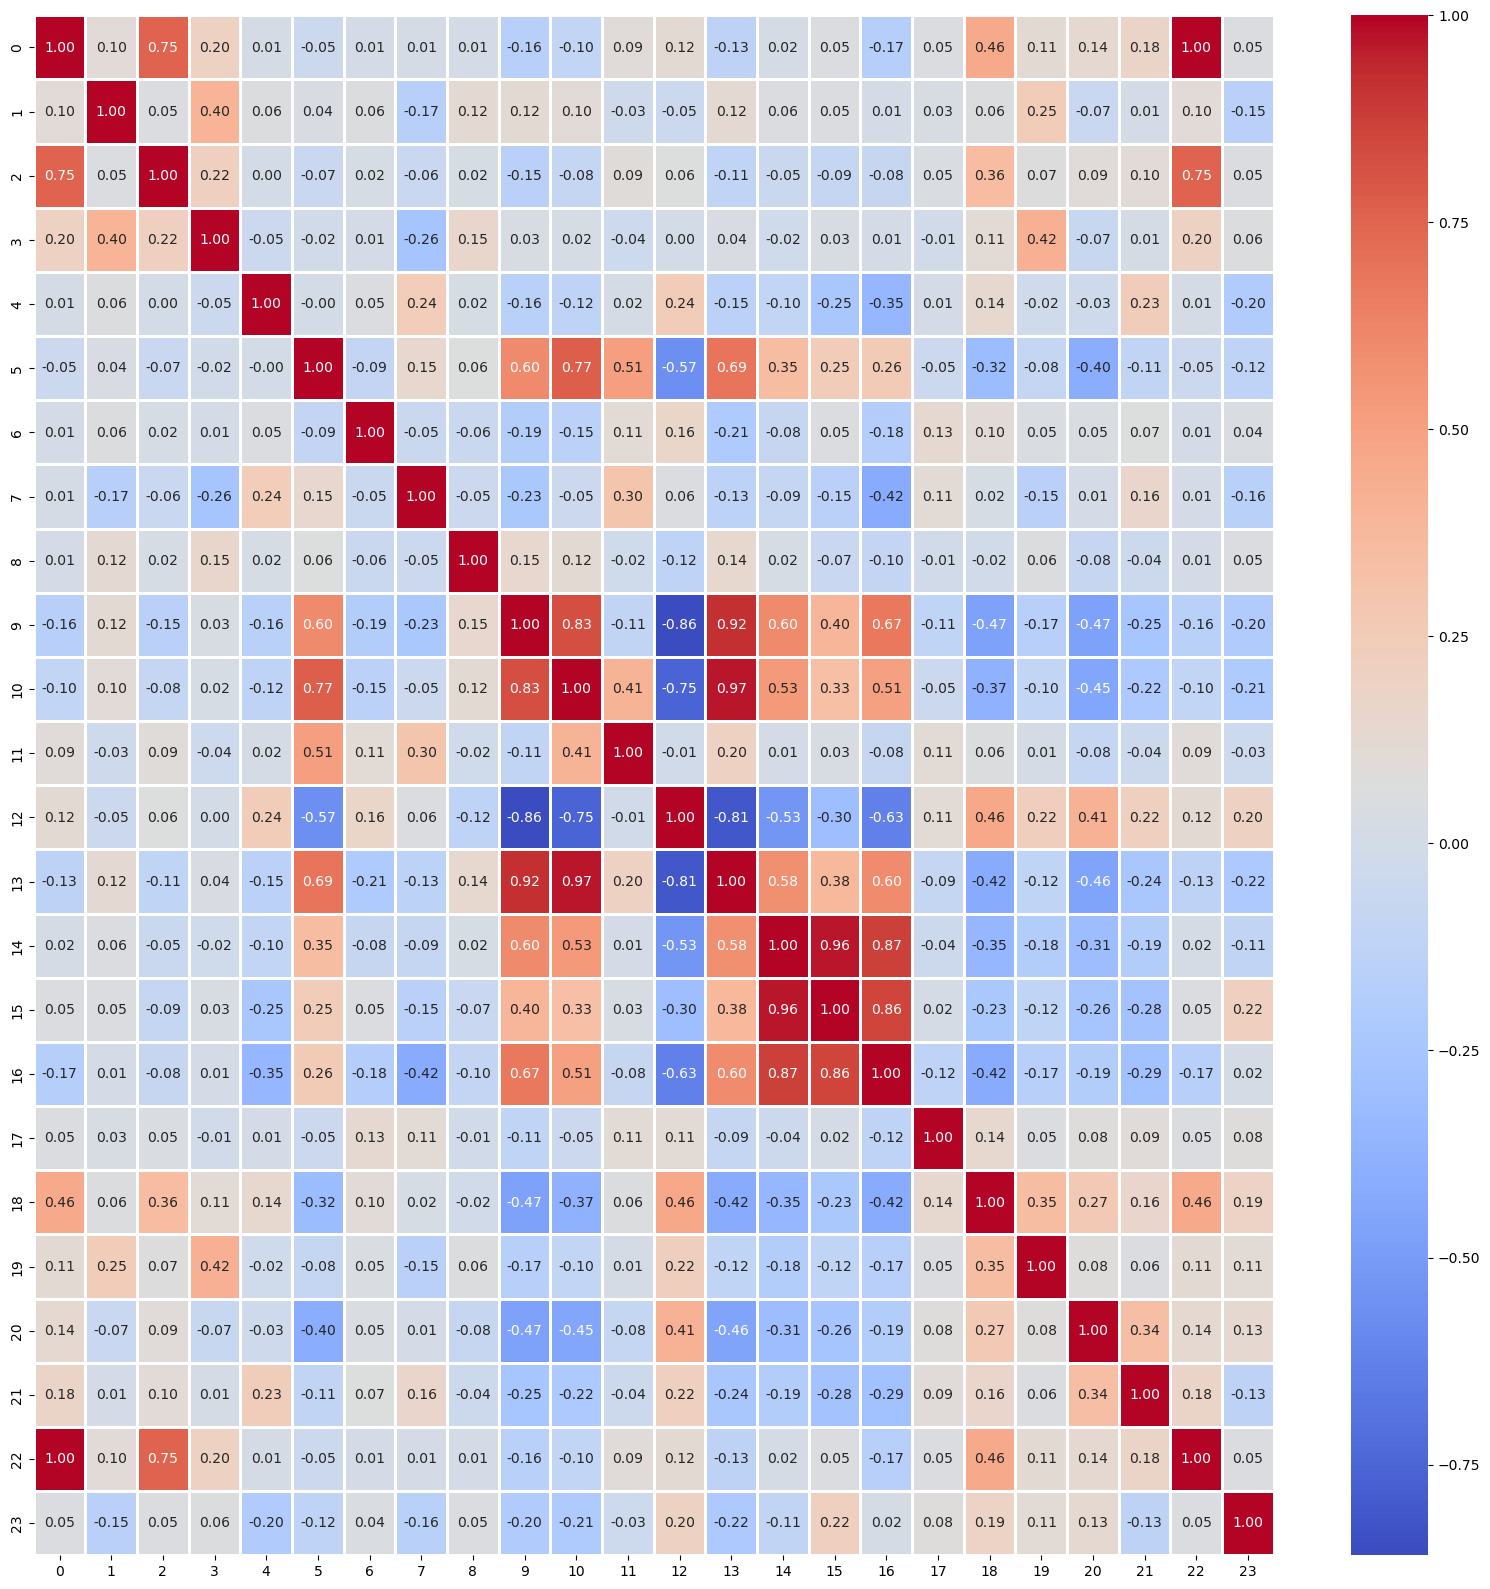

In [12]:
# visualizing the correlation matrix to see if there are dependacies between the features
X = pd.DataFrame(X)
correlation_matrix = X.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)

In [13]:
# from the above heatmap , we can observe that some feautures  are
# redundant . So, removing these features would be a good idea.
X = pd.DataFrame(X)
indices_to_drop = [15,16,17,22]  # Assuming 0-based indexing
X = X.drop(X.columns[indices_to_drop], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23
0,1404.0,12.0,64.0,14.0,3.0,1.0,1.0,1.0,110.502,35775.2,35797.1,0.000261,0.172,1436.052,5000.5,104.0,12.0,2.0,32.0,37677.1
1,909.0,0.0,235.0,32.0,1.0,1.0,1.0,1.0,-40.448,35779.4,35794.3,0.000178,0.032,1436.111,3720.5,20.0,1.0,0.0,13.0,25239.1
2,654.0,3.0,175.0,2.0,1.0,1.0,1.0,1.0,-27.445,35770.4,35803.3,0.000391,0.021,1436.103,4685.4,1.0,1.0,0.0,13.0,27683.5
3,1372.0,12.0,382.0,14.0,2.0,0.0,1.0,0.0,0.001,509.2,513.5,0.000291,97.541,94.844,NaN,313.0,12.0,10.0,54.0,39363.2
4,786.0,3.0,199.0,2.0,1.0,0.0,1.0,0.0,0.001,612.1,697.3,0.006050,97.981,97.823,4.1,171.0,1.0,5.0,11.0,40044.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1388.0,0.0,382.0,14.0,2.0,0.0,1.0,0.0,0.002,628.5,656.5,0.002000,98.072,97.574,2700.4,104.0,12.0,11.0,53.0,41473.4
990,1339.0,0.0,344.0,14.0,3.0,0.0,1.0,0.0,0.002,520.3,540.3,0.001190,97.462,95.235,1.3,205.0,12.0,10.0,63.0,40916.2
991,527.0,7.0,40.0,5.0,5.0,2.0,1.0,3.0,0.005,19130.1,19162.4,0.000627,64.825,676.384,1415.5,101.0,6.0,7.0,95.0,37938.4
992,1144.0,12.0,120.0,14.0,3.0,0.0,1.0,0.0,0.003,785.2,803.3,0.001260,98.503,100.805,300.1,166.0,12.0,11.0,53.0,33433.5


In [14]:
# filling the Nan fields in a column with random values based 
# on the values in that column.
for column in X.columns:
    nan_mask = X[column].isna()
    num_nans = nan_mask.sum()
    
    if num_nans > 0:
        random_values = np.random.choice(X[column].dropna(), num_nans)
        X.loc[nan_mask, column] = random_values
        
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,18,19,20,21,23
0,1404.0,12.0,64.0,14.0,3.0,1.0,1.0,1.0,110.502,35775.2,35797.1,0.000261,0.172,1436.052,5000.5,104.0,12.0,2.0,32.0,37677.1
1,909.0,0.0,235.0,32.0,1.0,1.0,1.0,1.0,-40.448,35779.4,35794.3,0.000178,0.032,1436.111,3720.5,20.0,1.0,0.0,13.0,25239.1
2,654.0,3.0,175.0,2.0,1.0,1.0,1.0,1.0,-27.445,35770.4,35803.3,0.000391,0.021,1436.103,4685.4,1.0,1.0,0.0,13.0,27683.5
3,1372.0,12.0,382.0,14.0,2.0,0.0,1.0,0.0,0.001,509.2,513.5,0.000291,97.541,94.844,70.4,313.0,12.0,10.0,54.0,39363.2
4,786.0,3.0,199.0,2.0,1.0,0.0,1.0,0.0,0.001,612.1,697.3,0.006050,97.981,97.823,4.1,171.0,1.0,5.0,11.0,40044.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1388.0,0.0,382.0,14.0,2.0,0.0,1.0,0.0,0.002,628.5,656.5,0.002000,98.072,97.574,2700.4,104.0,12.0,11.0,53.0,41473.4
990,1339.0,0.0,344.0,14.0,3.0,0.0,1.0,0.0,0.002,520.3,540.3,0.001190,97.462,95.235,1.3,205.0,12.0,10.0,63.0,40916.2
991,527.0,7.0,40.0,5.0,5.0,2.0,1.0,3.0,0.005,19130.1,19162.4,0.000627,64.825,676.384,1415.5,101.0,6.0,7.0,95.0,37938.4
992,1144.0,12.0,120.0,14.0,3.0,0.0,1.0,0.0,0.003,785.2,803.3,0.001260,98.503,100.805,300.1,166.0,12.0,11.0,53.0,33433.5


In [15]:
# scaling the data so that all the features will be in the same scale
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
# we can observe that the dataset given is imbalanced. So it's important
# to do oversampling before training so that there are enough number
# of data points from each class.
ros = RandomOverSampler(random_state=14)
X, y = ros.fit_resample(X, y)

In [17]:
# using the XGBoost method to train the data.
classifier = XGBClassifier()
classifier.fit(X,y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [18]:
# loding the test data
test_data = pd.read_csv('test_input.csv')
X_test = test_data.iloc[:,:]

<AxesSubplot:>

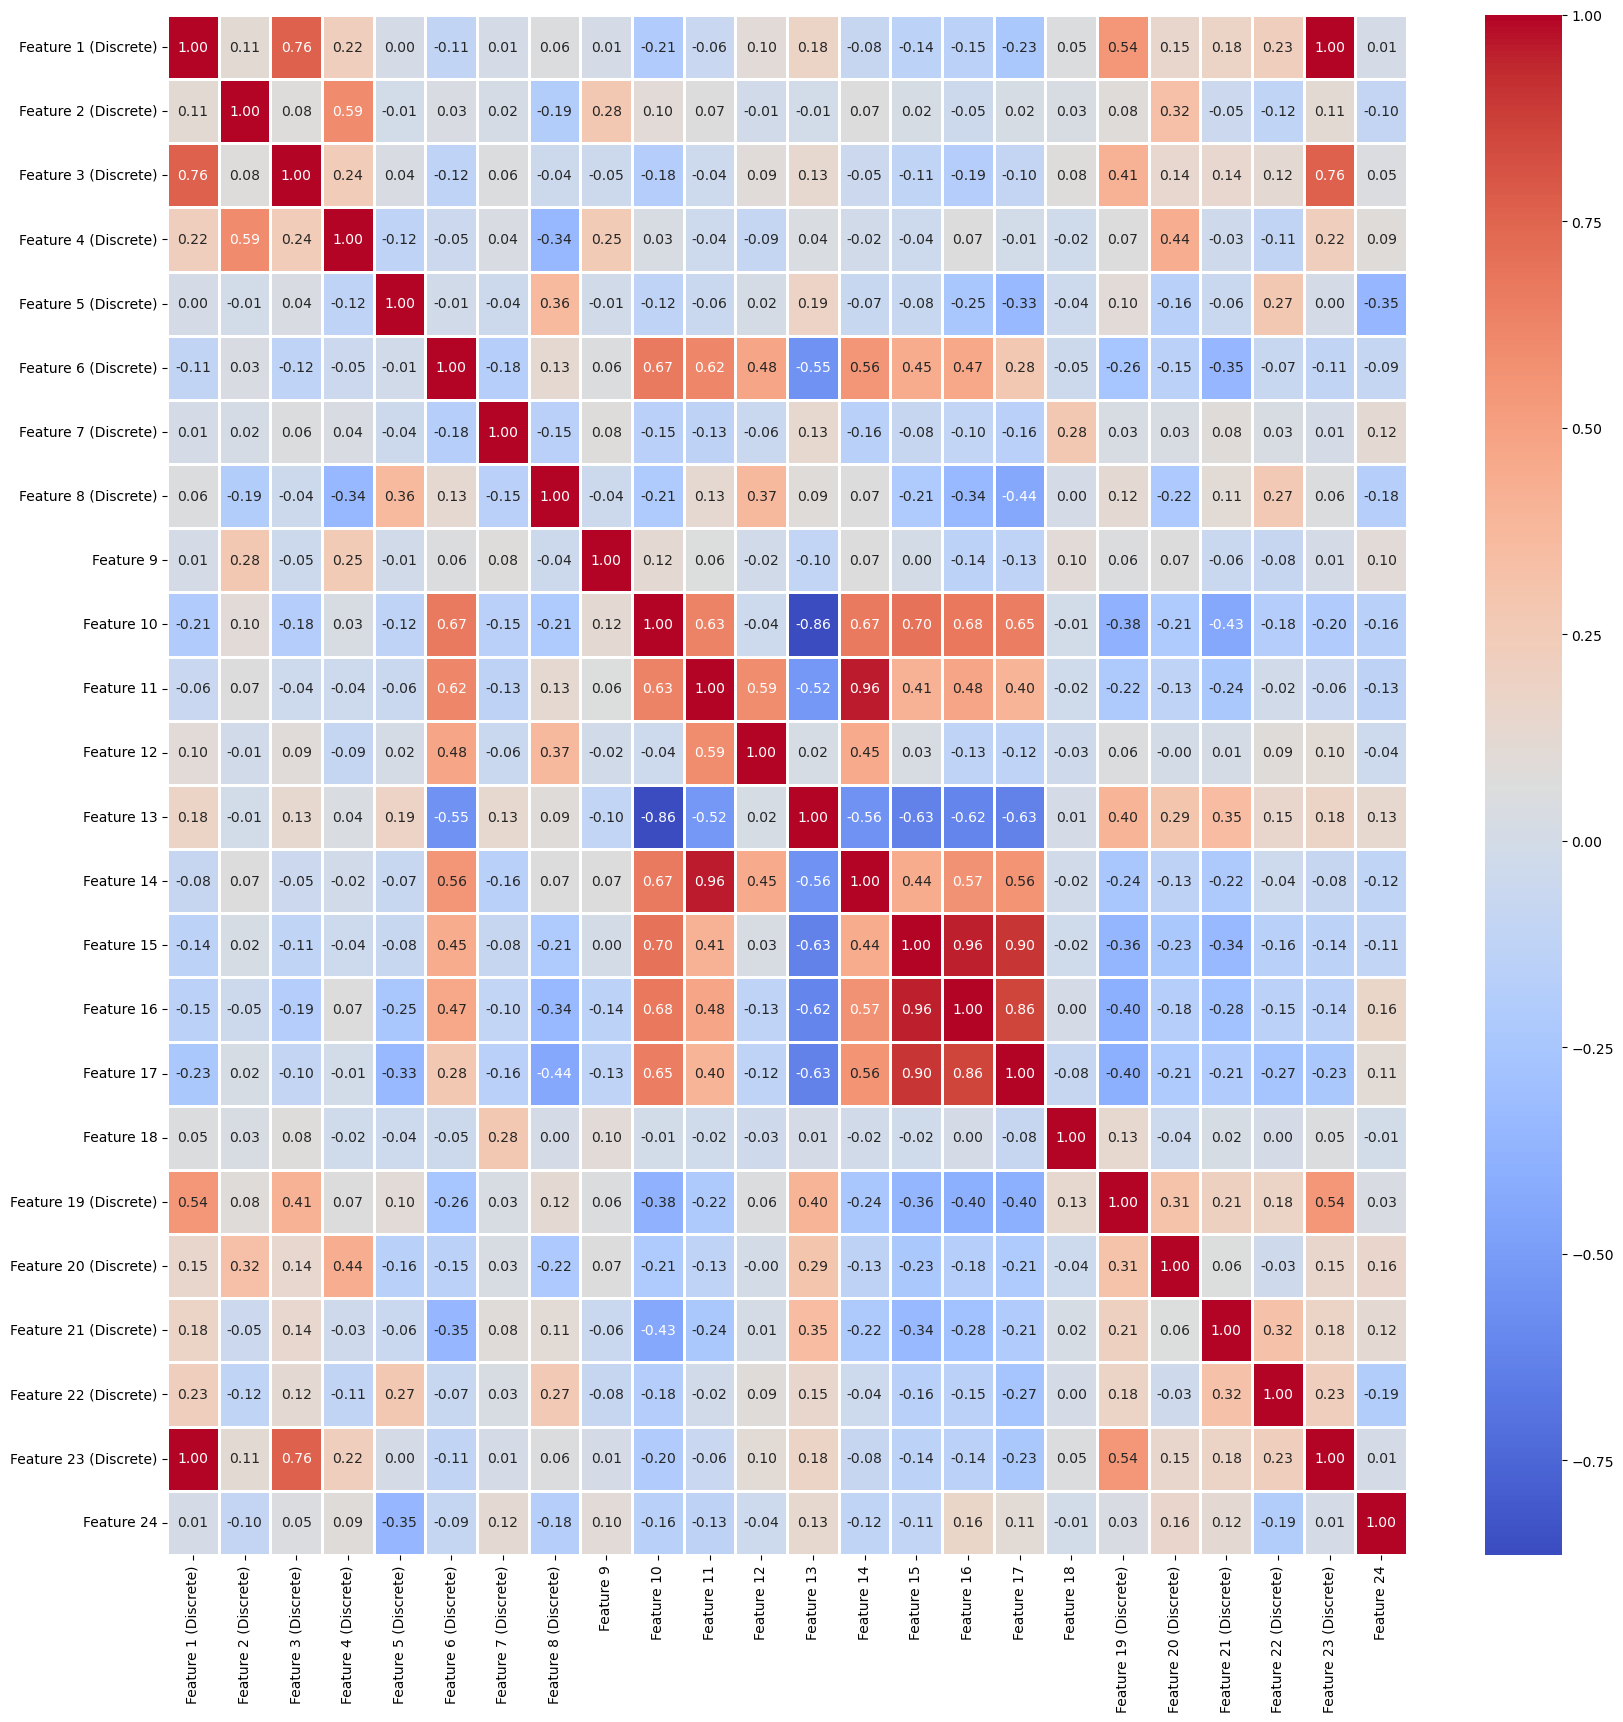

In [19]:
# visualizing the correlation matrix of the test data as well to see if there 
# are dependacies between the features as in train data.
X_test = pd.DataFrame(X_test)
correlation_matrix = X_test.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)


In [20]:
# dropping the columns of redundant features from the test data.
X_test = pd.DataFrame(X_test)
X_test = X_test.drop(X_test.columns[indices_to_drop], axis=1)

In [21]:
# filling the missing values in a column with random values based
# on the values in the corresponding column.
for column in X_test.columns:
    nan_mask = X_test[column].isna()
    num_nans = nan_mask.sum()
    
    if num_nans > 0:
        random_values = np.random.choice(X_test[column].dropna(), num_nans)
        X_test.loc[nan_mask, column] = random_values
        
X_test = pd.DataFrame(X_test)

In [22]:
# scaling the test data so that all features will be in the same scale.
X_test = sc.transform(X_test)

c:\Users\gaman\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [23]:
# predicting the class labels for the test data.
y_pred = classifier.predict(X_test)

In [24]:
# printing the predicted class labels to an output file named "test_output.csv"
index = np.arange(1, len(y_pred) + 1)
result = np.column_stack((index, y_pred))
csv_file_path = 'test_output.csv'
header = 'Id,Category'
np.savetxt(csv_file_path, result, delimiter=',', fmt='%d', header=header, comments='')